### 一、导入数据并处理数据

##### 本文数据是超市的销售情况。两个表分别是销售总价表格和对应详细的销售情况表。首先导入数据，判断数据有无缺失值、重复值、异常值等情况。

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from pandas import to_datetime

In [4]:
data1=pd.read_csv('datastore1.csv',encoding="gb2312")
data2=pd.read_csv('datastore2.csv',encoding="gb2312")

In [5]:
#判断有无缺失值
data1.isnull().sum(axis=0)

SHOP_DATETIME    0
STORE_CODE       0
POS_NO           0
BASK_CODE        0
BASK_SPEND       0
dtype: int64

In [6]:
data2.isnull().sum(axis=0)

SDATE              0
STORE_CODE         0
POSID              0
BASK_CODE          0
PROD_CODE          0
ITEM_QUANTITY      0
ITEM_SPEND         0
NORMAL_PRICE       0
DISCOUNT_TYPE      0
DISCOUNT_AMOUNT    0
dtype: int64

In [7]:
data1.describe()

,POS_NO,BASK_CODE,BASK_SPEND
count,571552.000000,571552.000000,571552.000000
mean,2.998429,167472.817102,38.973310
std,2.516065,87263.199857,209.038276
min,1.000000,961.000000,-35940.000000
25%,1.000000,90533.750000,9.000000
50%,2.000000,177603.500000,19.900000
75%,3.000000,238816.750000,44.700000
max,20.000000,323914.000000,79920.000000


In [8]:
pop=data1.loc[:,'BASK_SPEND'] > 0
data1= data1.loc[pop,:]
data1.describe()

,POS_NO,BASK_CODE,BASK_SPEND
count,569797.000000,569797.000000,569797.000000
mean,2.994330,167572.136898,39.583197
std,2.502507,87224.915886,196.158166
min,1.000000,961.000000,0.010000
25%,1.000000,90673.000000,9.000000
50%,2.000000,177692.000000,20.000000
75%,3.000000,238933.000000,44.800000
max,20.000000,323914.000000,79920.000000


In [9]:
data2.describe()

,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_AMOUNT
count,1.732761e+06,1.732761e+06,1.732761e+06,1.732761e+06,1.732761e+06,1.732761e+06,1.732761e+06
mean,2.994959e+00,1.659824e+05,1.144861e+05,1.436702e+00,1.285536e+01,1.424412e+01,-1.624232e+00
std,2.470286e+00,8.583102e+04,8.161988e+04,7.015504e+00,1.022148e+02,2.403937e+01,5.160490e+01
min,1.000000e+00,9.610000e+02,1.900000e+01,-6.000000e+02,-3.594000e+04,5.000000e-01,-5.760000e+04
25%,1.000000e+00,8.995200e+04,2.183500e+04,1.000000e+00,3.800000e+00,3.800000e+00,-1.000000e+00
50%,2.000000e+00,1.758280e+05,1.233210e+05,1.000000e+00,7.000000e+00,7.800000e+00,0.000000e+00
75%,3.000000e+00,2.229530e+05,1.959930e+05,1.000000e+00,1.200000e+01,1.500000e+01,0.000000e+00
max,2.000000e+01,3.239140e+05,2.250470e+05,4.020000e+03,6.912000e+04,1.980000e+03,9.300000e+02


In [10]:
pop1=data2.loc[:,'ITEM_SPEND'] >0
data2= data2.loc[pop1,:]
pop2=data2.loc[:,'ITEM_QUANTITY'] >0
data2=data2.loc[pop2,:]
data2.describe()

,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_AMOUNT
count,1.730099e+06,1.730099e+06,1.730099e+06,1.730099e+06,1.730099e+06,1.730099e+06,1.730099e+06
mean,2.993406e+00,1.660229e+05,1.144745e+05,1.444062e+00,1.303645e+01,1.420607e+01,-1.611119e+00
std,2.465070e+00,8.581586e+04,8.160804e+04,6.975110e+00,9.334512e+01,2.392655e+01,5.146345e+01
min,1.000000e+00,9.610000e+02,1.900000e+01,1.000000e-02,1.000000e-02,5.000000e-01,-5.760000e+04
25%,1.000000e+00,8.999650e+04,2.183500e+04,1.000000e+00,3.800000e+00,3.800000e+00,-1.000000e+00
50%,2.000000e+00,1.758750e+05,1.233210e+05,1.000000e+00,7.020000e+00,7.700000e+00,0.000000e+00
75%,3.000000e+00,2.229690e+05,1.959930e+05,1.000000e+00,1.203000e+01,1.500000e+01,0.000000e+00
max,2.000000e+01,3.239140e+05,2.250470e+05,4.020000e+03,6.912000e+04,1.980000e+03,2.264000e+02


In [11]:
data1.duplicated().sum()

0

In [12]:
data2.duplicated().sum()#有重复是因为购买了同一物品购买多次

212634

### 二、对数据进行分析

##### 为方便分析数据，将两个表的相同概念的列名统一

In [13]:
data1.columns=['SDATE','STORE_CODE','POSID','BASK_CODE','BASK_SPEND']
data2.columns=['SDATE','STORE_CODE','POSID','BASK_CODE','PROD_CODE','ITEM_QUANTITY','ITEM_SPEND','NORMAL_PRICE','DISCOUNT_TYPE','DISCOUNT_AMOUNT']

##### 1、首先判断共有多少个商店

In [14]:
store_number=data1.drop_duplicates(subset=['STORE_CODE'])
store_number.shape[0]

24

In [15]:
store_number=data2.drop_duplicates(subset=['STORE_CODE'])
store_number.shape[0]

24

##### 结论：通过对两个表分析，可以得知超市共有24家

##### 2、计算从6月1号至7月5号各个店的销售次数情况（不等于销售金额）

In [16]:
a=data1['STORE_CODE'].value_counts()
a

A001    66507
D002    62949
D007    37503
A008    36462
A013    30064
A006    28470
A012    24946
A009    21809
D004    21362
D008    21029
A021    20555
A010    19543
D006    18572
A016    18279
A007    17954
A019    16985
D009    15827
A018    15731
D005    15261
A022    15260
A004    13429
A017    12459
D010    11070
D003     7771
Name: STORE_CODE, dtype: int64

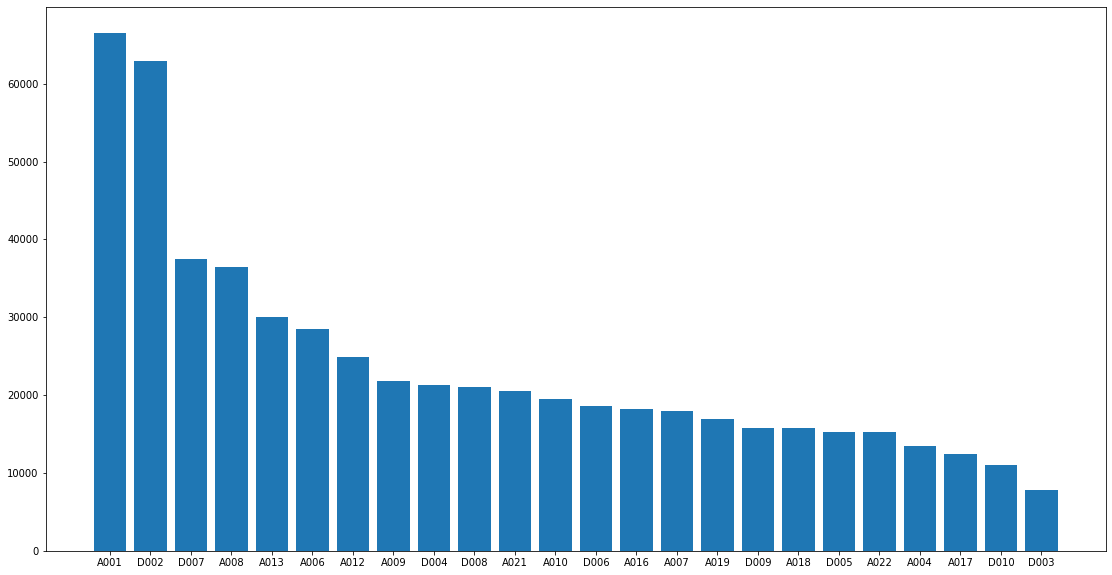

In [18]:
plt.bar(a.index, a.values)
plt.rcParams['figure.figsize'] = (19.0, 10.0)
plt.show()

##### 从上图可知各店的销售次数情况，销售次数多可能与超市选址有关。

##### 3、计算从6月1号至7月5号各个店的销售金额

In [19]:
from pandas import to_datetime
#时间转化
groupdata1=data1
groupdata1.SDATE=to_datetime(groupdata1.SDATE,format="%Y/%m/%d")
groupdata1.head()

,SDATE,STORE_CODE,POSID,BASK_CODE,BASK_SPEND
0,2018-06-01,D007,3,250458,8.0
1,2018-06-01,D007,3,250200,32.7
2,2018-06-01,D007,1,161068,16.8
3,2018-06-01,D007,8,5325,30.4
4,2018-06-01,D007,8,5361,191.3


In [20]:
groupdata1.sort_values(by='SDATE', inplace=True)

In [21]:
gb2 = groupdata1.groupby(groupdata1.STORE_CODE)
gb2

In [22]:
store_data1 = gb2.sum()
store_data1.head()

,POSID,BASK_CODE,BASK_SPEND
STORE_CODE,,,
A001,362297,11569109746,3.478348e+06
A004,27594,1522658556,5.156631e+05
A006,65559,8042653934,9.439233e+05
A007,36558,2042843270,6.938853e+05
A008,93968,7748221557,1.324641e+06


In [23]:
store_data1.sort_values("BASK_SPEND",ascending=False,inplace=True)
store_data1.head()

,POSID,BASK_CODE,BASK_SPEND
STORE_CODE,,,
A001,362297,11569109746,3.478348e+06
D002,362228,8181180122,3.177385e+06
D007,90900,8030277804,1.382203e+06
A008,93968,7748221557,1.324641e+06
A013,110035,5133025011,1.126551e+06


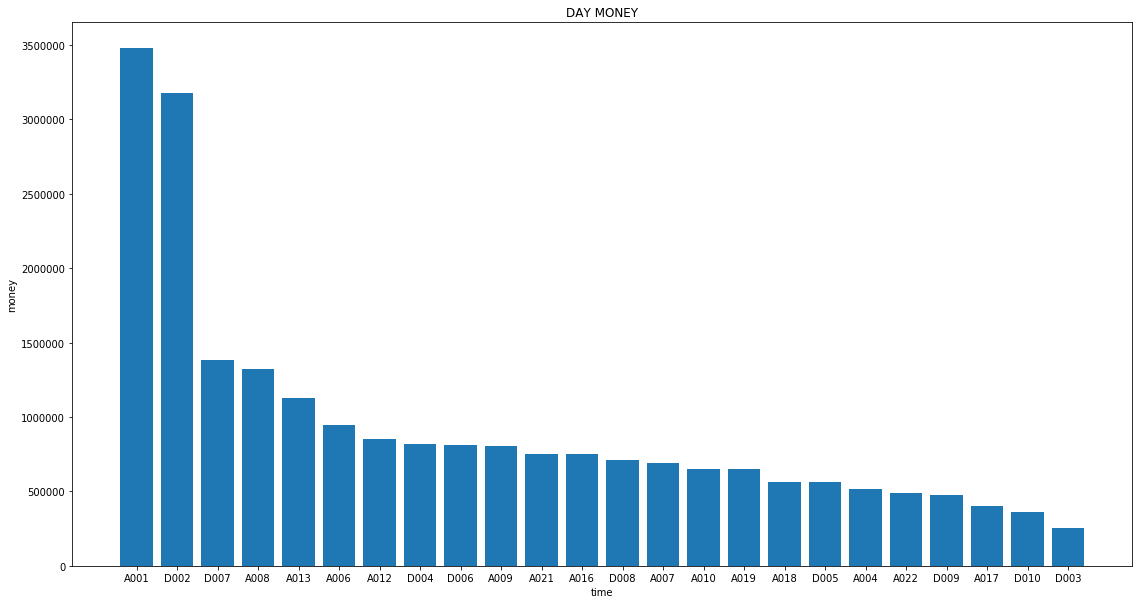

In [24]:
from pylab import mpl
#mpl.rcParams['font.sans-serif'] = ['SimHei']
plt.bar(store_data1.index,store_data1['BASK_SPEND'])
plt.title('DAY MONEY')
plt.xlabel('time')
plt.ylabel('money')
plt.rcParams['figure.figsize'] = (19.0, 10.0)
plt.show()

##### 对比销售次数图和销售金额图，发现商店的排序基本对应，这说明销售次数高的销售金额也高

##### 4、计算从6月1号至7月5号每天的销售金额排序

In [25]:
gb = groupdata1.groupby(groupdata1.SDATE)
gb

In [26]:
#对应时间相加
day_data1 = gb.sum()

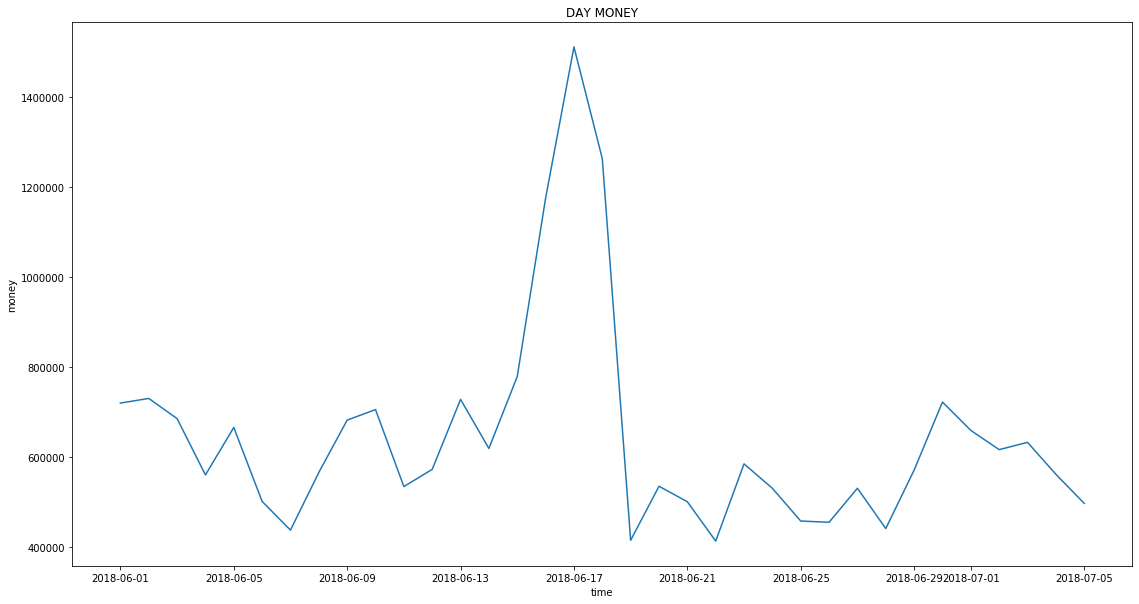

In [28]:
from pylab import mpl
plt.plot(day_data1['BASK_SPEND'])
plt.title('DAY MONEY')
plt.xlabel('time')
plt.ylabel('money')
plt.rcParams['figure.figsize'] = (19.0, 10.0)
plt.show()

##### 从上图可以看出每天总金额的变化，在6月17日销售额达到最值，这天是中秋节，金额的巨幅提高可能与此有较大关系。

##### 5、日售卖金额

In [29]:
totalMoney = data1.loc[:,'BASK_SPEND'].sum()

In [30]:
DAYS= data1.drop_duplicates(subset=['SDATE'])
totalI = DAYS.shape[0]
totalI

35

In [31]:
days_m=totalMoney//totalI
days_m

644411.0

##### 6、次平均售卖金额

In [32]:
total_costnumber=data1.shape[0]
day_cost=totalMoney//total_costnumber
day_cost

39.0

##### 7、分析销售次数最多和销售次数最少的两家商店金额的变化。

In [33]:
date_store = data1.groupby(['STORE_CODE', 'SDATE']).size()

In [34]:
date_A001 = date_store['A001']
date_A001_dict= {'SDATE': date_A001.index,'COUNT': date_A001.values}
date_A001 = pd.DataFrame(date_A001_dict)
date_A001['SDATE'] = date_A001['SDATE'].apply(lambda x:x.strftime('%Y.%m.%d'))
date_A001 = date_A001.set_index('SDATE')

In [35]:
date_D003  = date_store['D003']
date_D003_dict= {'SDATE': date_D003.index,'COUNT': date_D003.values}
date_D003 = pd.DataFrame(date_D003_dict)
date_D003['SDATE'] = date_D003['SDATE'].apply(lambda x:x.strftime('%Y.%m.%d'))
date_D003 = date_D003.set_index('SDATE')

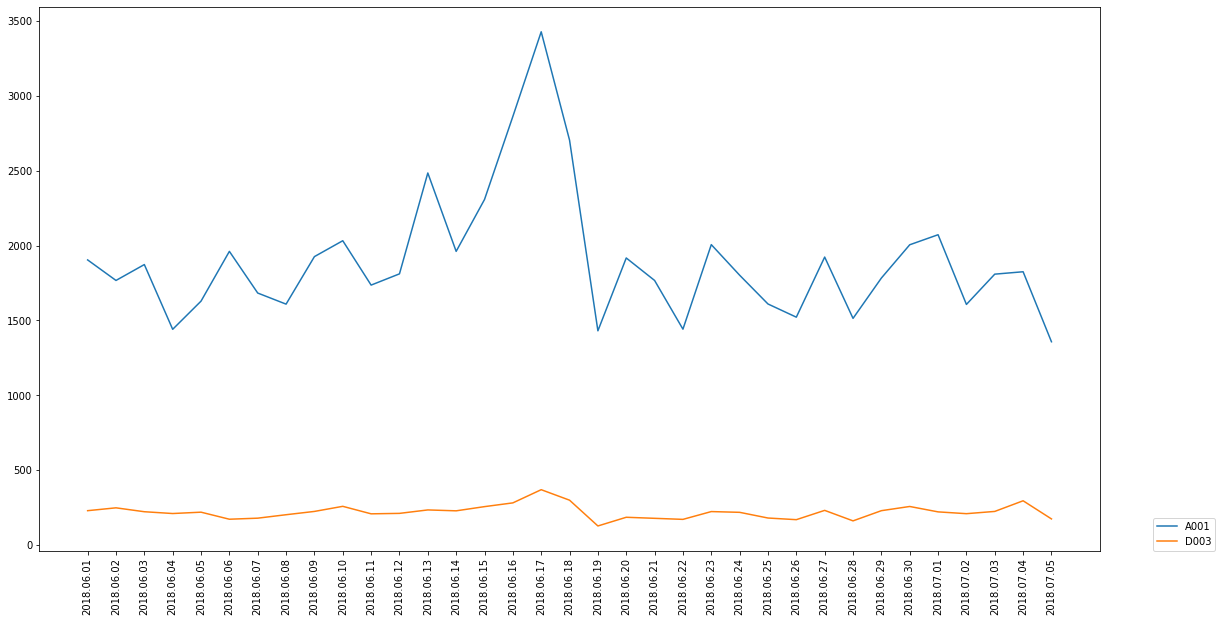

In [36]:
fig1, = plt.plot(date_A001.index, date_A001.values)
plt.xticks(date_A001.index, rotation=90)
fig2, = plt.plot(date_D003.index, date_D003.values)
plt.legend([fig1, fig2], ['A001', 'D003'], bbox_to_anchor=(1.05, 0), loc=3, borderaxespad=0)
plt.show()

##### 从上图可以看出A001每天的销量依然有大变化，但是D003每天的销售额变化幅度非常小。

##### 8、判断限量前10的商品之间有无相关性

In [37]:
groupdata2=data2
groupdata2.SDATE=to_datetime(groupdata2.SDATE,format="%Y/%m/%d")
groupdata2.sort_values(by='SDATE', inplace=True)
gb2 = groupdata2.groupby(groupdata2.PROD_CODE)
gb2

In [38]:
product_data2 = gb2.sum()
product_data2

,POSID,BASK_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_AMOUNT
PROD_CODE,,,,,,
19,51,1432102,13.0,496.7,505.7,-9.0
31,422,24662773,141.0,5184.9,5922.0,-737.1
33,49,2487295,15.0,613.5,613.5,0.0
36,133,8874084,52.0,1341.6,1341.6,0.0
39,437,13774376,83.0,406.7,406.7,0.0
...,...,...,...,...,...,...
224973,1,218136,1.0,33.8,33.8,0.0
224993,3,278501,1.0,14.5,14.5,0.0
225009,3,180867,1.0,9.9,9.9,0.0


In [39]:
product_sort=product_data2.sort_values('ITEM_QUANTITY',axis = 0,ascending = False)
product_sort.head(10)

,POSID,BASK_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_AMOUNT
PROD_CODE,,,,,,
149413,6839,378662245,39931.00,173820.33,12005.233338,-22560.37
86772,8845,521091166,31365.00,65967.20,8187.833333,-12221.30
220834,4518,251784144,25704.00,127622.90,8471.500001,-8513.40
7133,25551,451855888,23028.00,289784.00,107567.000000,-1129.00
61623,9258,432129591,21828.00,38905.90,5040.166667,-863.40
124556,14340,923116764,19907.00,17103.17,5182.000000,-2411.23
205540,37018,2165376903,19313.00,27650.23,18122.200000,-36.97
1152,5021,247137394,19183.00,46344.39,3768.068750,-121.01
194690,28456,1577241570,18151.51,61628.75,37169.080000,-9163.47


In [56]:
top1=data2[data2.PROD_CODE==149413]
top1=top1.sort_values('SDATE',axis = 0,ascending = True)
top1.head()

,SDATE,STORE_CODE,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_TYPE,DISCOUNT_AMOUNT
48527,2018-06-01,A021,3,73050,149413,12.0,50.9,4.916667,m,-8.1
13751,2018-06-01,D006,2,35045,149413,12.0,40.0,4.583333,p,-15.0
11296,2018-06-01,D006,3,148731,149413,12.0,40.0,4.583333,p,-15.0
11269,2018-06-01,D006,2,35150,149413,12.0,40.0,4.583333,p,-15.0
10521,2018-06-01,D002,1,49104,149413,12.0,43.8,4.900000,p,-15.0


In [57]:
top1_daysale=top1.groupby(top1.SDATE)
top1_daysale=top1_daysale.sum().reset_index()
top1_daysale.head()

,SDATE,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_AMOUNT
0,2018-06-01,191,7153774,8964780,676.0,2644.22,293.700000,-638.18
1,2018-06-02,186,9710806,10160084,797.0,3181.24,332.400000,-682.06
2,2018-06-03,231,9916094,10608323,823.0,3213.90,347.850000,-772.80
3,2018-06-04,116,6520464,6723585,541.0,2156.10,217.650000,-454.20
4,2018-06-05,134,6665615,7620063,590.0,2367.40,245.616667,-472.20


In [58]:
#销量前五的商品每日销售情况
plt.figure(figsize=(12,7))

top2=data2[data2.PROD_CODE==86772]
top2=top2.sort_values('SDATE',axis = 0,ascending = True)
top2_daysale=top2.groupby(top2.SDATE)
top2_daysale=top2_daysale.sum().reset_index()

top3=data2[data2.PROD_CODE==220834]
top3=top3.sort_values('SDATE',axis = 0,ascending = True)
top3_daysale=top3.groupby(top3.SDATE)
top3_daysale=top3_daysale.sum().reset_index()

top4=data2[data2.PROD_CODE==7133]
top4=top4.sort_values('SDATE',axis = 0,ascending = True)
top4_daysale=top4.groupby(top4.SDATE)
top4_daysale=top4_daysale.sum().reset_index()

top5=data2[data2.PROD_CODE==61623]
top5=top5.sort_values('SDATE',axis = 0,ascending = True)
top5_daysale=top5.groupby(top5.SDATE)
top5_daysale=top5_daysale.sum().reset_index()

<Figure size 864x504 with 0 Axes>

In [59]:
top1_daysale.head()

,SDATE,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_AMOUNT
0,2018-06-01,191,7153774,8964780,676.0,2644.22,293.700000,-638.18
1,2018-06-02,186,9710806,10160084,797.0,3181.24,332.400000,-682.06
2,2018-06-03,231,9916094,10608323,823.0,3213.90,347.850000,-772.80
3,2018-06-04,116,6520464,6723585,541.0,2156.10,217.650000,-454.20
4,2018-06-05,134,6665615,7620063,590.0,2367.40,245.616667,-472.20


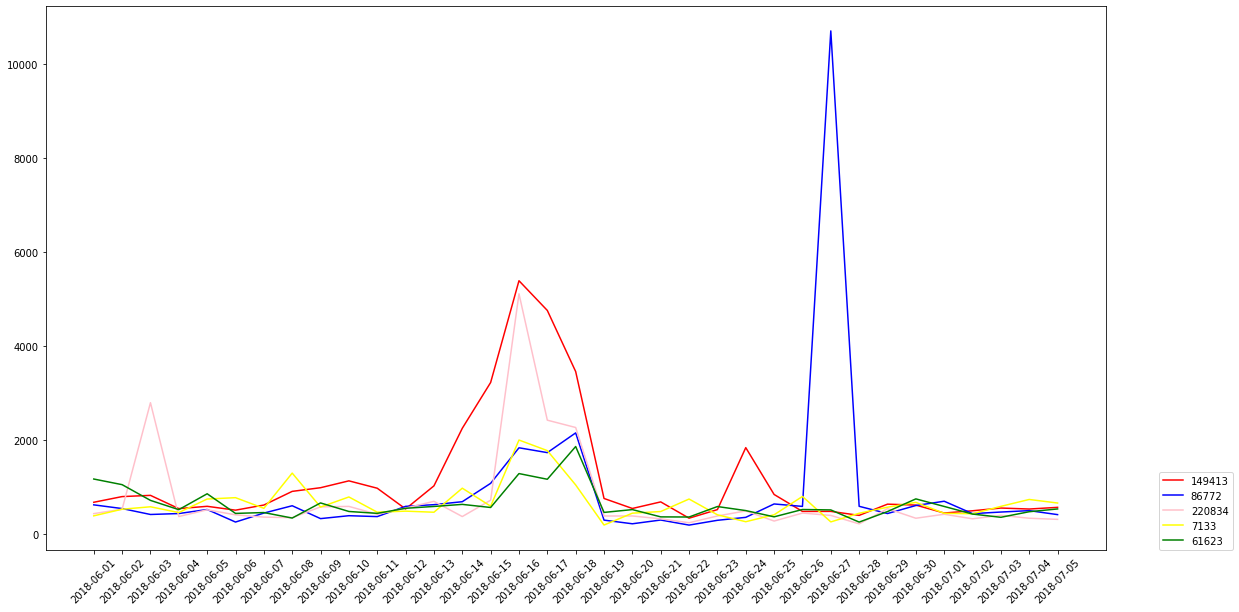

In [60]:
fig1, = plt.plot(top1_daysale.SDATE,top1_daysale.ITEM_QUANTITY,color='red')
plt.xticks(top2_daysale.SDATE, rotation=45)
fig2, = plt.plot(top2_daysale.SDATE, top2_daysale.ITEM_QUANTITY,color='blue')
fig3, = plt.plot(top3_daysale.SDATE, top3_daysale.ITEM_QUANTITY,color='pink')
fig4, = plt.plot(top4_daysale.SDATE, top4_daysale.ITEM_QUANTITY,color='yellow')
fig5, = plt.plot(top5_daysale.SDATE, top5_daysale.ITEM_QUANTITY,color='green')

plt.legend([fig1, fig2,fig3,fig4,fig5], ['149413','86772', '220834','7133','61623'], bbox_to_anchor=(1.05, 0), loc=3, borderaxespad=0)
plt.show()

In [61]:
top1_daysale.head()

,SDATE,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_AMOUNT
0,2018-06-01,191,7153774,8964780,676.0,2644.22,293.700000,-638.18
1,2018-06-02,186,9710806,10160084,797.0,3181.24,332.400000,-682.06
2,2018-06-03,231,9916094,10608323,823.0,3213.90,347.850000,-772.80
3,2018-06-04,116,6520464,6723585,541.0,2156.10,217.650000,-454.20
4,2018-06-05,134,6665615,7620063,590.0,2367.40,245.616667,-472.20


In [62]:
top1_daysale = top1_daysale.drop(['POSID','BASK_CODE','ITEM_QUANTITY','ITEM_SPEND','NORMAL_PRICE','DISCOUNT_AMOUNT'],axis=1)
top2_daysale = top2_daysale.drop(['SDATE','POSID','BASK_CODE','ITEM_QUANTITY','ITEM_SPEND','NORMAL_PRICE','DISCOUNT_AMOUNT'],axis=1)
top3_daysale = top3_daysale.drop(['SDATE','POSID','BASK_CODE','ITEM_QUANTITY','ITEM_SPEND','NORMAL_PRICE','DISCOUNT_AMOUNT'],axis=1)
top4_daysale = top4_daysale.drop(['SDATE','POSID','BASK_CODE','ITEM_QUANTITY','ITEM_SPEND','NORMAL_PRICE','DISCOUNT_AMOUNT'],axis=1)
top5_daysale = top5_daysale.drop(['SDATE','POSID','BASK_CODE','ITEM_QUANTITY','ITEM_SPEND','NORMAL_PRICE','DISCOUNT_AMOUNT'],axis=1)
item_daysale = pd.concat([top1_daysale, top2_daysale,top3_daysale,top4_daysale,top5_daysale], axis=1, join_axes=[top1_daysale.index])
item_daysale.head()

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  


,SDATE,PROD_CODE,PROD_CODE,PROD_CODE,PROD_CODE,PROD_CODE
0,2018-06-01,8964780,5466636,8391692,1127014,11954862
1,2018-06-02,10160084,5987268,9716696,1077083,7148268
2,2018-06-03,10608323,5293092,7508356,1127014,6532038
3,2018-06-04,6723585,5813724,6845854,1055684,4436856
4,2018-06-05,7620063,5293092,9495862,1241142,6223923


In [63]:
item_daysale.columns=['date','top1','top2','top3','top4','top5']

In [64]:
correlation_matrix=item_daysale.corr()
correlation_matrix

,top1,top2,top3,top4,top5
top1,1.000000,0.260033,0.970225,0.341620,0.524066
top2,0.260033,1.000000,0.257063,-0.010445,0.115279
top3,0.970225,0.257063,1.000000,0.323483,0.515114
top4,0.341620,-0.010445,0.323483,1.000000,0.440224
top5,0.524066,0.115279,0.515114,0.440224,1.000000


[Text(0, 0, 'top1'),
 Text(0, 0, 'top2'),
 Text(0, 0, 'top3'),
 Text(0, 0, 'top4'),
 Text(0, 0, 'top5')]

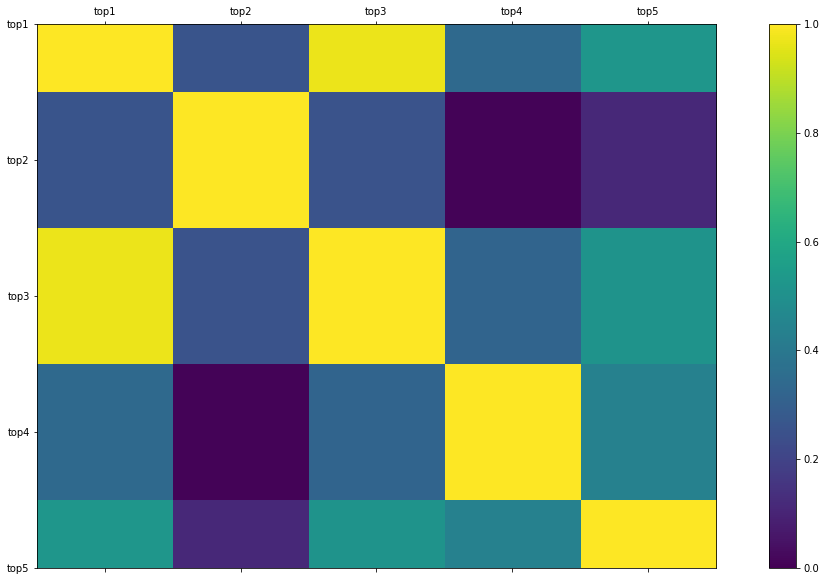

In [65]:
fig = plt.figure() # 调用figure创建一个绘图对象 
ax = fig.add_subplot(111) # 设置1个子网格并添加子网格对象 
hot_img = ax.matshow(np.abs(correlation_matrix), vmin=0, vmax=1) 
# 绘制热力图，值域从0到1 
fig.colorbar(hot_img) # 为热力图生成颜色渐变条 
ticks = np.arange(0, 5, 1) # 生成0～9，步长为1 
ax.set_xticks(ticks) # 生成x轴刻度 
ax.set_yticks(ticks) # 设置y轴刻度 
names = ['top1','top2','top3','top4','top5'] # 生成坐标轴标签文字 
ax.set_xticklabels(names) # 生成x轴标签 
ax.set_yticklabels(names) # 生成y轴标签 

##### 从热力图中可以看出产品149413和产品220834具有高相关性。